# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
# taken from Day079 example code
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
# adapted from Day079 example code
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95 # for SGD
RHO = 0.9 # for RMSprop

In [7]:
results = {}

# adapted from Day079 example code
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    #optimizer = keras.optimizers.RMSprop(learning_rate=lr, rho=RHO)
    #optimizer = keras.optimizers.Adagrad(learning_rate=lr)
    optimizer = keras.optimizers.Adam(learning_rate=lr)    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 6s 117us/step - loss: 2.3068 - accuracy: 0.1005 - val_loss: 2.3073 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3068 - accuracy: 0.1024 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.3078 - accuracy: 0.0982 - val_loss: 2.3044 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

Epoch 46/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6498 - accuracy: 0.4029 - val_loss: 1.6708 - val_accuracy: 0.3968
Epoch 47/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6483 - accuracy: 0.4034 - val_loss: 1.7066 - val_accuracy: 0.3875
Epoch 48/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6458 - accuracy: 0.4038 - val_loss: 1.7057 - val_accuracy: 0.3843
Epoch 49/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6536 - accuracy: 0.4014 - val_loss: 1.7480 - val_accuracy: 0.3778
Epoch 50/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6507 - accuracy: 0.4039 - val_loss: 1.7085 - val_accuracy: 0.3841
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

Epoch 44/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.7043 - accuracy: 0.7479 - val_loss: 1.6866 - val_accuracy: 0.5195
Epoch 45/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.6856 - accuracy: 0.7549 - val_loss: 1.7339 - val_accuracy: 0.5164
Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.6808 - accuracy: 0.7573 - val_loss: 1.7449 - val_accuracy: 0.5118
Epoch 47/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.6788 - accuracy: 0.7576 - val_loss: 1.7388 - val_accuracy: 0.5131
Epoch 48/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.6611 - accuracy: 0.7633 - val_loss: 1.7652 - val_accuracy: 0.5166
Epoch 49/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.6412 - accuracy: 0.7706 - val_loss: 1.8061 - val_accuracy: 0.5138
Epoch 50/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.6350 - accuracy: 0.7728

Epoch 42/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.9159 - accuracy: 0.6817 - val_loss: 1.3542 - val_accuracy: 0.5337
Epoch 43/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.8975 - accuracy: 0.6914 - val_loss: 1.3467 - val_accuracy: 0.5376
Epoch 44/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.8919 - accuracy: 0.6910 - val_loss: 1.3494 - val_accuracy: 0.5341
Epoch 45/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.8746 - accuracy: 0.6983 - val_loss: 1.3379 - val_accuracy: 0.5407
Epoch 46/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.8628 - accuracy: 0.7031 - val_loss: 1.3347 - val_accuracy: 0.5413
Epoch 47/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.8531 - accuracy: 0.7075 - val_loss: 1.3608 - val_accuracy: 0.5346
Epoch 48/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.8408 - accuracy: 0.7104

Epoch 40/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4225 - accuracy: 0.5098 - val_loss: 1.4733 - val_accuracy: 0.4804
Epoch 41/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4160 - accuracy: 0.5107 - val_loss: 1.4692 - val_accuracy: 0.4780
Epoch 42/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4116 - accuracy: 0.5125 - val_loss: 1.4681 - val_accuracy: 0.4786
Epoch 43/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4073 - accuracy: 0.5148 - val_loss: 1.4634 - val_accuracy: 0.4819
Epoch 44/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4020 - accuracy: 0.5151 - val_loss: 1.4630 - val_accuracy: 0.4808
Epoch 45/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.3973 - accuracy: 0.5161 - val_loss: 1.4576 - val_accuracy: 0.4845
Epoch 46/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.3915 - accuracy: 0.5202

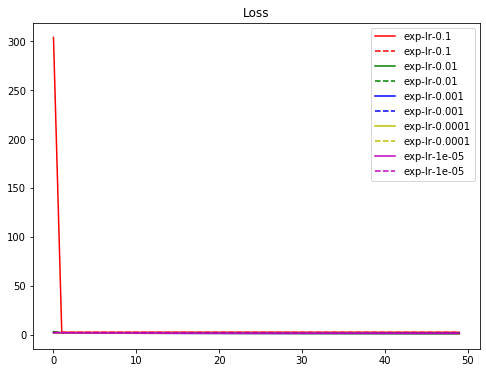

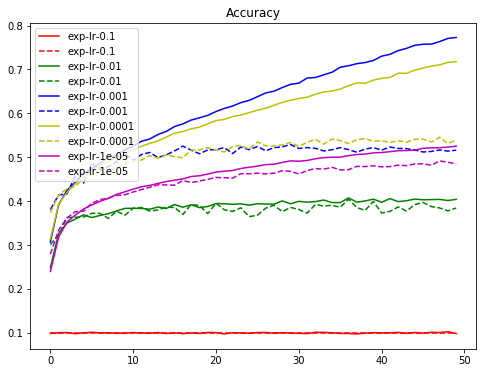

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()